# Informe de entrenamiento Lurigancho
Este cuaderno reúne tablas y visualizaciones para los archivos `train_log_abstract.csv`, `train_log_lurigancho_fixed.csv`, `train_log_lurigancho_random.csv` y `lurigancho_fixed_eval_det.csv`.

Las celdas siguientes muestran estadísticos agregados, episodios extremos, comparaciones visuales entre datasets y las gráficas exportadas previamente para que puedas revisar todos los artefactos desde un único lugar.

In [ ]:
print("Helloworld")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Image

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (10, 4)


In [2]:
LOG_SOURCES = [
    ("Step 1", "results/train_log_abstract.csv"),
    ("Step 3", "results/train_log_lurigancho_fixed.csv"),
    ("Step 2", "results/train_log_lurigancho_random.csv"),
]

logs = {}
for label, path in LOG_SOURCES:
    df = pd.read_csv(path)
    logs[label] = df
    display(Markdown(f"**{label}** — {len(df)} episodios"))
    display(df.head(3))

eval_df = pd.read_csv("results/lurigancho_fixed_eval_det.csv")
display(Markdown("**Resultados de evaluación (escenario determinista)**"))
display(eval_df)


**Step 1** — 212 episodios

,episode,coverage,return,adv,phase,loss_pi,loss_v,episode_seconds,total_seconds
0,0,0.0,-6.98388,-6.93913,phase1_simple,0.270042,50.150406,16.479,16.480
1,1,0.0,-7.45899,-6.75338,phase1_simple,0.287406,48.047783,16.909,33.390
2,2,0.0,-7.97373,-6.62766,phase1_simple,0.317888,47.019073,17.075,50.466


**Step 3** — 135 episodios

,episode,coverage,return,adv,phase,loss_pi,loss_v,episode_seconds,total_seconds
0,0,0.00,-3.23779,-0.15825,lurigancho_fixed,-0.038237,0.000012,118.767,118.768
1,0,0.04,-1.37047,-0.51012,lurigancho_fixed,-0.292875,0.220964,122.211,122.212
2,1,0.06,-1.72026,-0.42924,lurigancho_fixed,0.014687,0.025834,115.594,237.807


**Step 2** — 312 episodios

,episode,coverage,return,adv,phase,loss_pi,loss_v,episode_seconds,total_seconds
0,0,0.0,-8.47410,-6.69933,lurigancho_random,-0.744632,34.774731,19.428,19.430
1,1,0.0,-8.83663,-6.59936,lurigancho_random,0.259002,45.039742,19.163,38.594
2,2,0.0,-9.16807,-6.50204,lurigancho_random,-0.216760,38.618282,22.192,60.787


**Resultados de evaluación (escenario determinista)**

,avg_tardiness_mean,avg_tardiness_std,coverage_mean,coverage_std,distance_mean,distance_std,duration_mean,duration_std,energy_per_uav_mean,energy_per_uav_std,policy,rtb_mean,rtb_std,served_mean,served_std,total_pois_mean,total_pois_std,violations_mean,violations_std
0,0.000,0.000000,0.080,0.000000,22325.4804,2.290410e+01,134.0,0.000000,152.6798,0.037960,marl,0.0,0.0,4.0,0.000000,50.0,0.0,0.0,0.000000
1,0.000,0.000000,0.020,0.000000,213.9120,2.842171e-14,102.0,0.000000,107.2015,0.000000,greedy,0.0,0.0,1.0,0.000000,50.0,0.0,0.0,0.000000
2,5.796,2.694362,0.772,0.132424,15701.3232,3.088072e+02,308.6,20.421557,319.8359,21.337074,genetic,0.0,0.0,38.6,6.621178,50.0,0.0,5.0,1.264911


In [3]:
summary_rows = []
for label, df in logs.items():
    summary_rows.append({
        "dataset": label,
        "episodios": len(df),
        "coverage_media": df["coverage"].mean(),
        "coverage_std": df["coverage"].std(),
        "return_medio": df["return"].mean(),
        "adv_medio": df["adv"].mean(),
        "loss_pi_media": df["loss_pi"].mean(),
        "loss_v_media": df["loss_v"].mean(),
        "duracion_media_s": df["episode_seconds"].mean(),
    })

summary_df = pd.DataFrame(summary_rows).set_index("dataset")
display(Markdown("**Estadísticos globales**"))
display(summary_df.round(3))

last10_rows = []
for label, df in logs.items():
    tail = df.tail(10)
    last10_rows.append({
        "dataset": label,
        "coverage_ultimos10": tail["coverage"].mean(),
        "return_ultimos10": tail["return"].mean(),
        "adv_ultimos10": tail["adv"].mean(),
        "loss_pi_ultimos10": tail["loss_pi"].mean(),
        "loss_v_ultimos10": tail["loss_v"].mean(),
    })

last10_df = pd.DataFrame(last10_rows).set_index("dataset")
display(Markdown("**Promedios de los últimos 10 episodios**"))
display(last10_df.round(3))


**Estadísticos globales**

,episodios,coverage_media,coverage_std,return_medio,adv_medio,loss_pi_media,loss_v_media,duracion_media_s
dataset,,,,,,,,
Step 1,212,0.256,0.180,-2.631,-0.146,-0.028,6.339,27.779
Step 3,135,0.604,0.175,-0.256,-0.918,-0.017,44.085,245.907
Step 2,312,0.591,0.261,6.905,0.140,-0.016,38.665,40.801


**Promedios de los últimos 10 episodios**

,coverage_ultimos10,return_ultimos10,adv_ultimos10,loss_pi_ultimos10,loss_v_ultimos10
dataset,,,,,
Step 1,0.205,-2.696,0.089,-0.048,4.399
Step 3,0.558,-3.909,-0.304,0.009,38.023
Step 2,0.722,12.962,0.254,-0.054,61.856


In [4]:
records = []
criteria = [
    ("Mayor cobertura", "coverage", "max"),
    ("Menor cobertura", "coverage", "min"),
    ("Mejor retorno", "return", "max"),
    ("Peor retorno", "return", "min"),
]

for label, df in logs.items():
    for crit_label, column, mode in criteria:
        idx = df[column].idxmax() if mode == "max" else df[column].idxmin()
        row = df.loc[idx, ["episode", "coverage", "return", "adv", "loss_pi", "loss_v", "episode_seconds"]]
        records.append({
            "dataset": label,
            "criterio": crit_label,
            "episodio": int(row["episode"]),
            "coverage": row["coverage"],
            "return": row["return"],
            "adv": row["adv"],
            "loss_pi": row["loss_pi"],
            "loss_v": row["loss_v"],
            "duracion_s": row["episode_seconds"],
        })

extremes_df = pd.DataFrame(records)
display(Markdown("**Episodios extremos por métrica**"))
display(extremes_df.round(3))


**Episodios extremos por métrica**

,dataset,criterio,episodio,coverage,return,adv,loss_pi,loss_v,duracion_s
0,Step 1,Mayor cobertura,7,1.00,0.063,0.365,-0.162,12.989,10.605
1,Step 1,Menor cobertura,0,0.00,-6.984,-6.939,0.270,50.150,16.479
2,Step 1,Mejor retorno,9,0.65,0.318,0.421,0.030,2.791,14.853
3,Step 1,Peor retorno,2,0.00,-7.974,-6.628,0.318,47.019,17.075
4,Step 3,Mayor cobertura,8,0.88,7.510,-2.771,-0.052,9.518,248.596
5,Step 3,Menor cobertura,0,0.00,-3.238,-0.158,-0.038,0.000,118.767
6,Step 3,Mejor retorno,0,0.80,9.994,-2.701,-0.465,45.101,142.761
7,Step 3,Peor retorno,115,0.60,-4.950,-1.226,-0.029,10.108,260.577
8,Step 2,Mayor cobertura,47,1.00,8.661,1.905,-0.072,102.826,35.259
9,Step 2,Menor cobertura,0,0.00,-8.474,-6.699,-0.745,34.775,19.428


In [5]:
import numpy as np

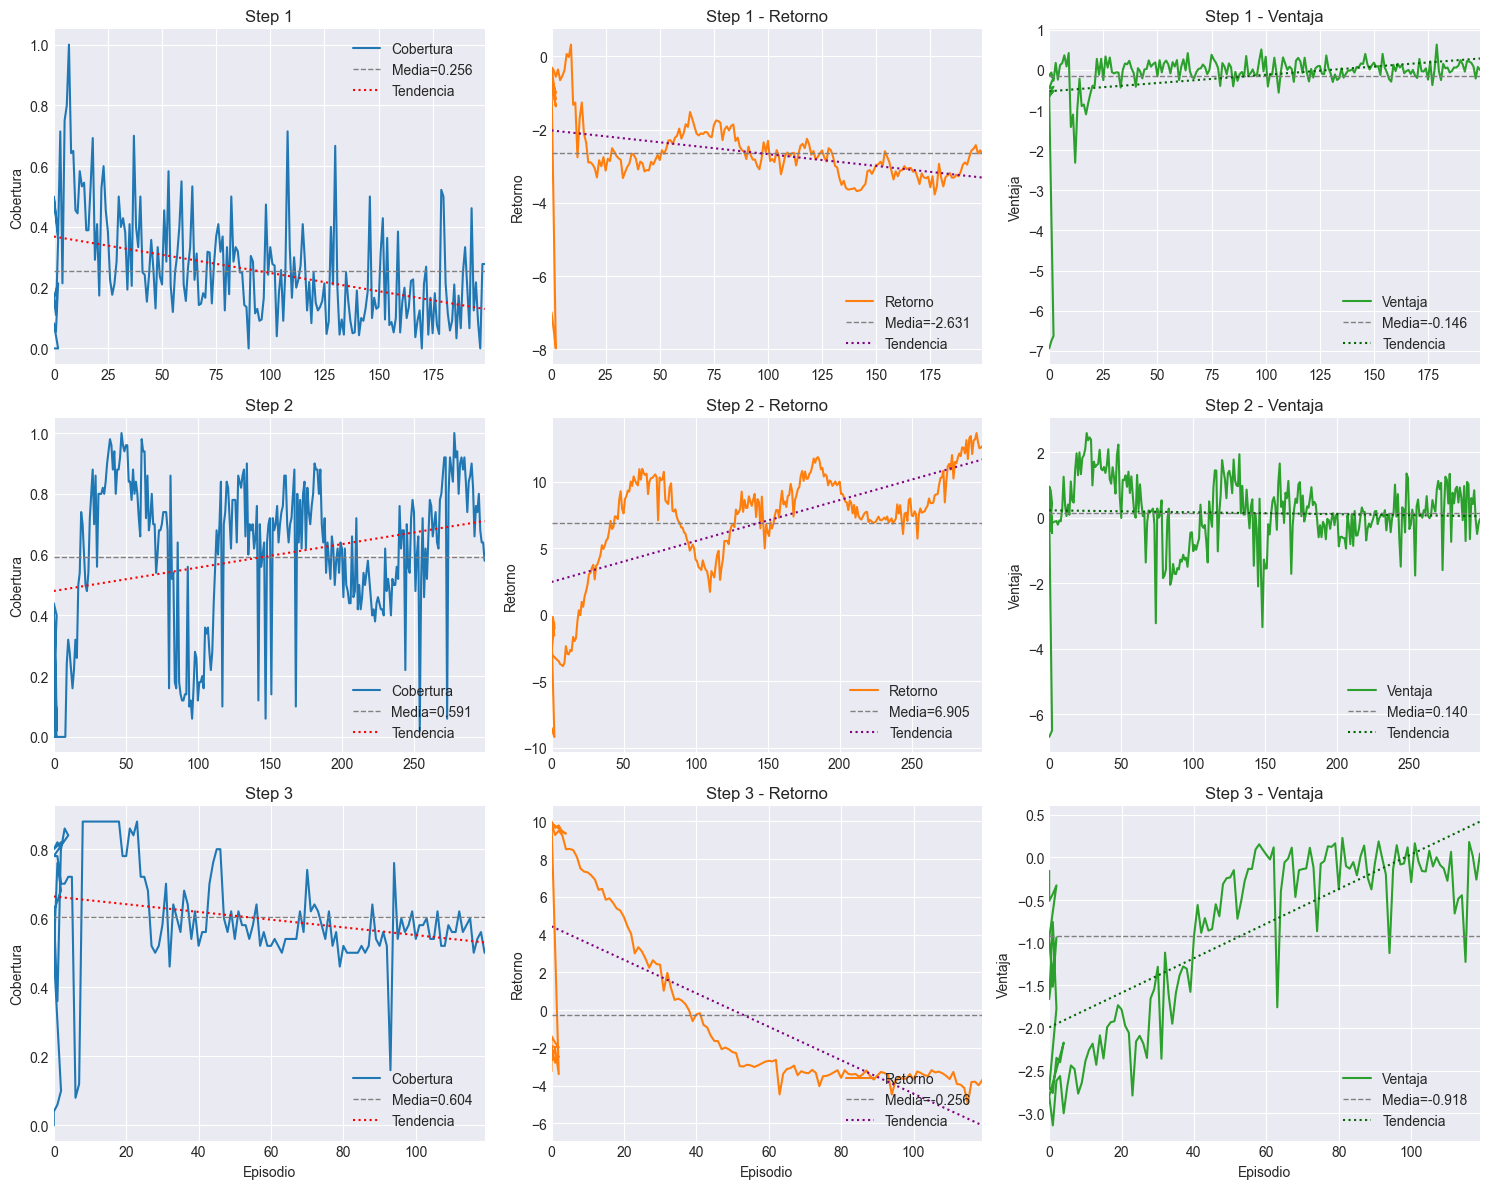

In [15]:
# Ordenamos explícitamente Step 1, Step 2, Step 3
ordered_sources = []
for step in ["Step 1", "Step 2", "Step 3"]:
    for label, path in LOG_SOURCES:
        if label == step:
            ordered_sources.append((label, path))

fig, axes = plt.subplots(len(ordered_sources), 3, figsize=(15, 12), sharex=False)

for idx, (label, _) in enumerate(ordered_sources):
    df = logs[label].dropna(subset=["episode"])
    min_ep, max_ep = df["episode"].min(), df["episode"].max()

     # --- Cobertura ---
    ax_cov = axes[idx, 0]
    ax_cov.plot(df["episode"], df["coverage"], label="Cobertura")
    cov_mean = df["coverage"].mean()
    ax_cov.axhline(cov_mean, color="gray", linestyle="--", linewidth=1, label=f"Media={cov_mean:.3f}")
    if len(df) >= 2:
        z_cov = np.polyfit(df["episode"], df["coverage"], 1)
        p_cov = np.poly1d(z_cov)
        ax_cov.plot(df["episode"], p_cov(df["episode"]), color="red", linestyle=":", linewidth=1.5, label="Tendencia")
    ax_cov.set_xlim(min_ep, max_ep)
    ax_cov.set_ylabel("Cobertura")
    ax_cov.set_title(label)
    # leyenda: Step 1 Cobertura arriba derecha; los demás igual que antes
    cov_legend_loc = "upper right" if label == "Step 1" else "lower right"
    ax_cov.legend(loc=cov_legend_loc)


    # --- Retorno ---
    ax_ret = axes[idx, 1]
    ax_ret.plot(df["episode"], df["return"], color="#ff7f0e", label="Retorno")
    ret_mean = df["return"].mean()
    ax_ret.axhline(ret_mean, color="gray", linestyle="--", linewidth=1, label=f"Media={ret_mean:.3f}")
    if len(df) >= 2:
        z_ret = np.polyfit(df["episode"], df["return"], 1)
        p_ret = np.poly1d(z_ret)
        ax_ret.plot(df["episode"], p_ret(df["episode"]), color="purple", linestyle=":", linewidth=1.5, label="Tendencia")
    ax_ret.set_xlim(min_ep, max_ep)
    ax_ret.set_ylabel("Retorno")
    ax_ret.set_title(f"{label} - Retorno")
    ax_ret.legend(loc="lower right")

    # --- Ventaja ---
    ax_adv = axes[idx, 2]
    ax_adv.plot(df["episode"], df["adv"], color="tab:green", label="Ventaja")
    adv_mean = df["adv"].mean()
    ax_adv.axhline(adv_mean, color="gray", linestyle="--", linewidth=1, label=f"Media={adv_mean:.3f}")
    if len(df) >= 2:
        z_adv = np.polyfit(df["episode"], df["adv"], 1)
        p_adv = np.poly1d(z_adv)
        ax_adv.plot(df["episode"], p_adv(df["episode"]), color="darkgreen", linestyle=":", linewidth=1.5, label="Tendencia")
    ax_adv.set_xlim(min_ep, max_ep)
    ax_adv.set_ylabel("Ventaja")
    ax_adv.set_title(f"{label} - Ventaja")
    ax_adv.legend(loc="lower right")

axes[-1, 0].set_xlabel("Episodio")
axes[-1, 1].set_xlabel("Episodio")
axes[-1, 2].set_xlabel("Episodio")

plt.tight_layout()
plt.show()


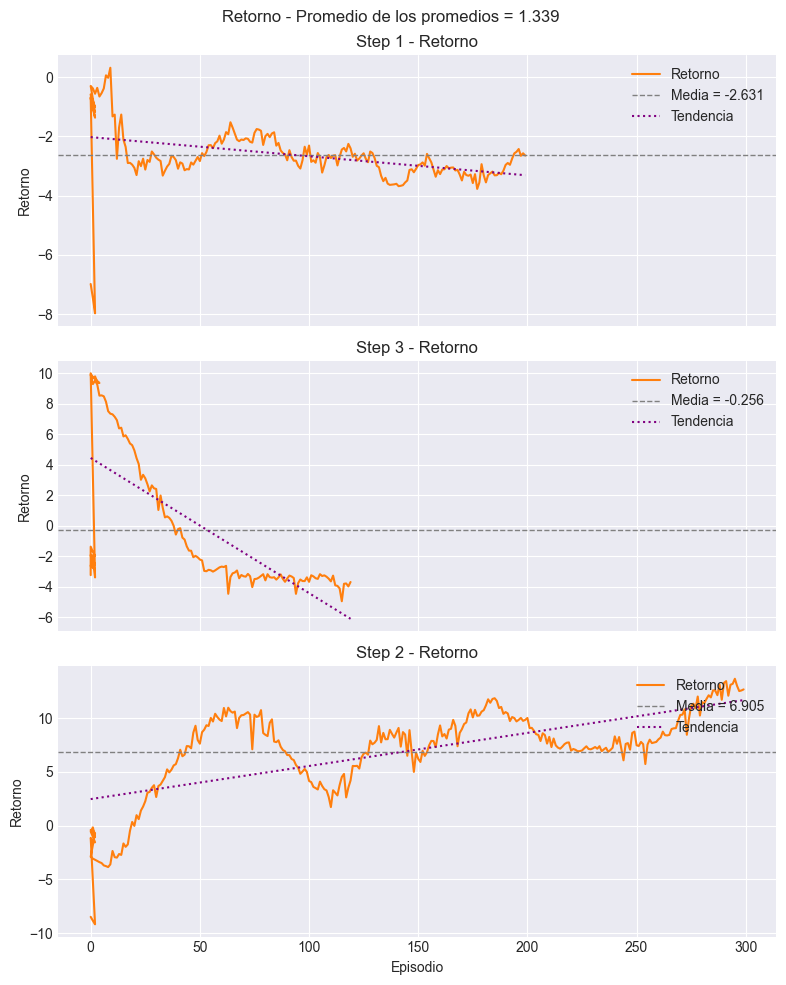

In [7]:
# --- PLOT RETORNO ---

fig, axes = plt.subplots(len(LOG_SOURCES), 1, figsize=(8, 10), sharex=True)

ret_means = []

for idx, (label, _) in enumerate(LOG_SOURCES):
    df = logs[label]
    ax_ret = axes[idx] if len(LOG_SOURCES) > 1 else axes

    # Media de este log
    mean_ret = df["return"].mean()
    ret_means.append(mean_ret)

    # Curva de retorno (línea naranja)
    ax_ret.plot(
        df["episode"],
        df["return"],
        color="#ff7f0e",
        label="Retorno"
    )

    # Línea horizontal: media
    ax_ret.axhline(
        mean_ret,
        color="gray",
        linestyle="--",
        linewidth=1,
        label=f"Media = {mean_ret:.3f}"
    )

    # Tendencia (regresión lineal)
    z_ret = np.polyfit(df["episode"], df["return"], 1)
    p_ret = np.poly1d(z_ret)
    ax_ret.plot(
        df["episode"],
        p_ret(df["episode"]),
        color="purple",
        linestyle=":",
        linewidth=1.5,
        label="Tendencia"
    )

    ax_ret.set_ylabel("Retorno")
    ax_ret.set_title(f"{label} - Retorno")
    ax_ret.legend(loc="upper right")

axes[-1].set_xlabel("Episodio")

# Promedio del promedio de retorno (entre todas las fuentes)
global_ret_mean = np.mean(ret_means)
fig.suptitle(f"Retorno - Promedio de los promedios = {global_ret_mean:.3f}", y=0.98)

plt.tight_layout()
plt.show()


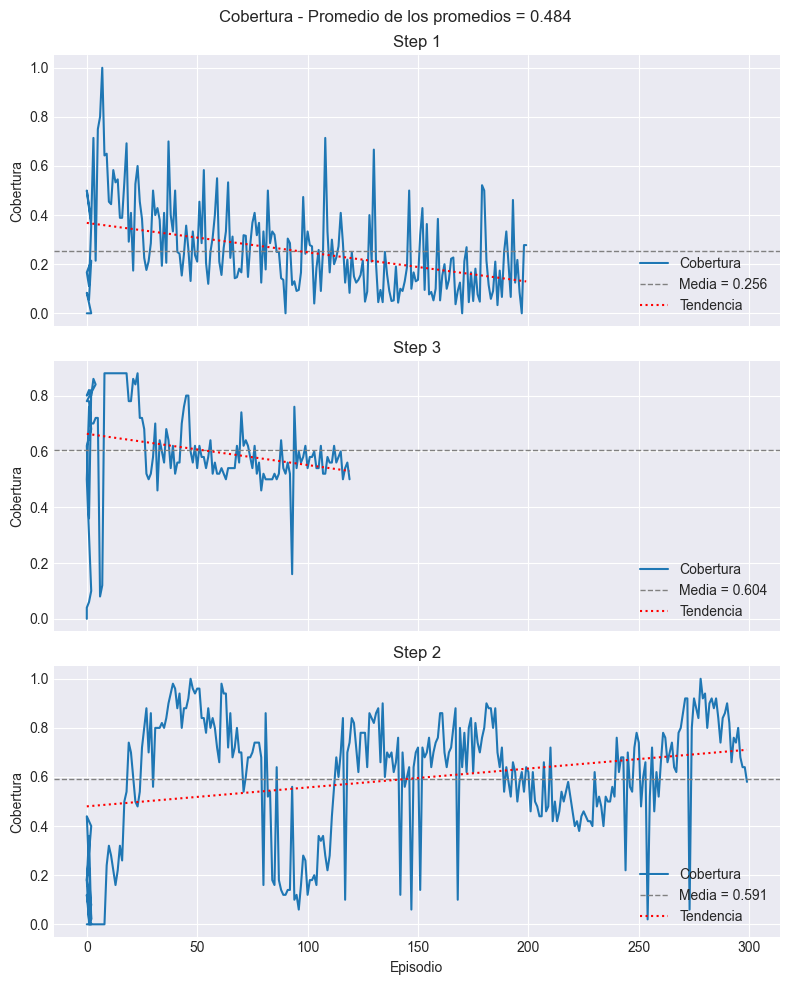

In [8]:
# --- PLOT COBERTURA ---

fig, axes = plt.subplots(len(LOG_SOURCES), 1, figsize=(8, 10), sharex=True)

cov_means = []

for idx, (label, _) in enumerate(LOG_SOURCES):
    df = logs[label]
    ax_cov = axes[idx] if len(LOG_SOURCES) > 1 else axes

    # Media de este log
    mean_cov = df["coverage"].mean()
    cov_means.append(mean_cov)

    # Curva de cobertura
    ax_cov.plot(df["episode"], df["coverage"], label=f"Cobertura")

    # Línea horizontal: media
    ax_cov.axhline(mean_cov, color="gray", linestyle="--", linewidth=1,
                   label=f"Media = {mean_cov:.3f}")

    # Tendencia (regresión lineal)
    z_cov = np.polyfit(df["episode"], df["coverage"], 1)
    p_cov = np.poly1d(z_cov)
    ax_cov.plot(
        df["episode"],
        p_cov(df["episode"]),
        color="red",
        linestyle=":",
        linewidth=1.5,
        label="Tendencia"
    )

    ax_cov.set_ylabel("Cobertura")
    ax_cov.set_title(label)
    ax_cov.legend(loc="lower right")

axes[-1].set_xlabel("Episodio")

# Promedio del promedio de cobertura (entre todas las fuentes)
global_cov_mean = np.mean(cov_means)
fig.suptitle(f"Cobertura - Promedio de los promedios = {global_cov_mean:.3f}", y=0.98)

plt.tight_layout()
plt.show()


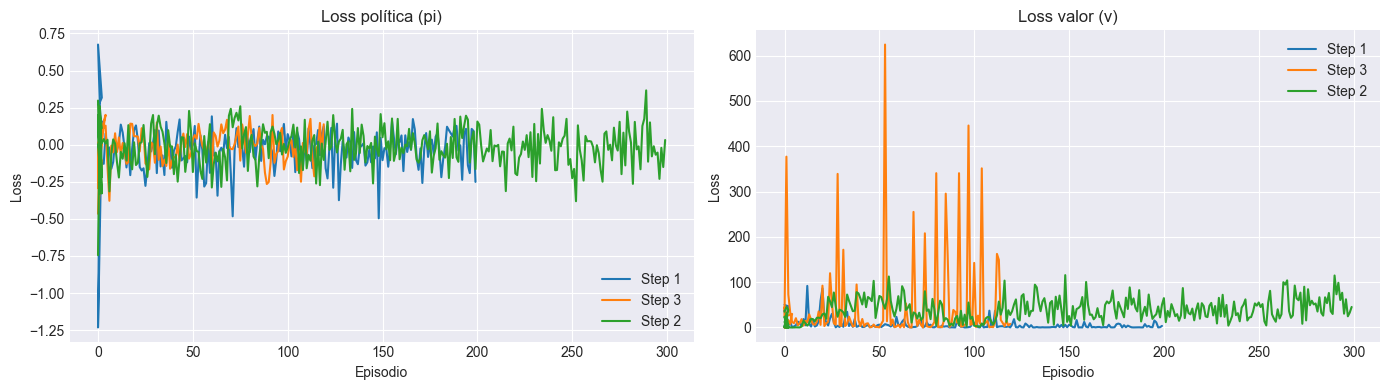

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)
for label, _ in LOG_SOURCES:
    df = logs[label]
    axes[0].plot(df["episode"], df["loss_pi"], label=label)
    axes[1].plot(df["episode"], df["loss_v"], label=label)
axes[0].set_title("Loss política (pi)")
axes[0].set_xlabel("Episodio")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[1].set_title("Loss valor (v)")
axes[1].set_xlabel("Episodio")
axes[1].set_ylabel("Loss")
axes[1].legend()
plt.tight_layout()
plt.show()


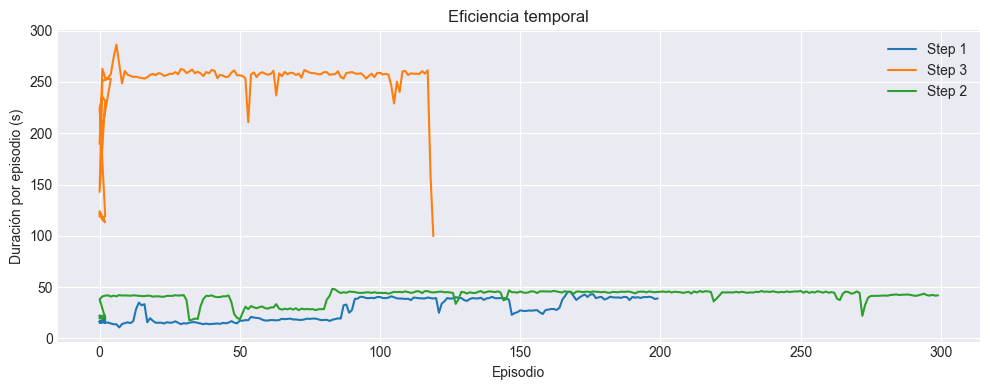

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
for label, _ in LOG_SOURCES:
    df = logs[label]
    ax.plot(df["episode"], df["episode_seconds"], label=label)
ax.set_ylabel("Duración por episodio (s)")
ax.set_xlabel("Episodio")
ax.set_title("Eficiencia temporal")
ax.legend()
plt.tight_layout()
plt.show()


**Comparativa de políticas en evaluación**

,policy,coverage_mean,served_mean,rtb_mean,violations_mean,distance_mean,energy_per_uav_mean
0,marl,0.080,4.0,0.0,0.0,22325.480,152.680
1,greedy,0.020,1.0,0.0,0.0,213.912,107.201
2,genetic,0.772,38.6,0.0,5.0,15701.323,319.836


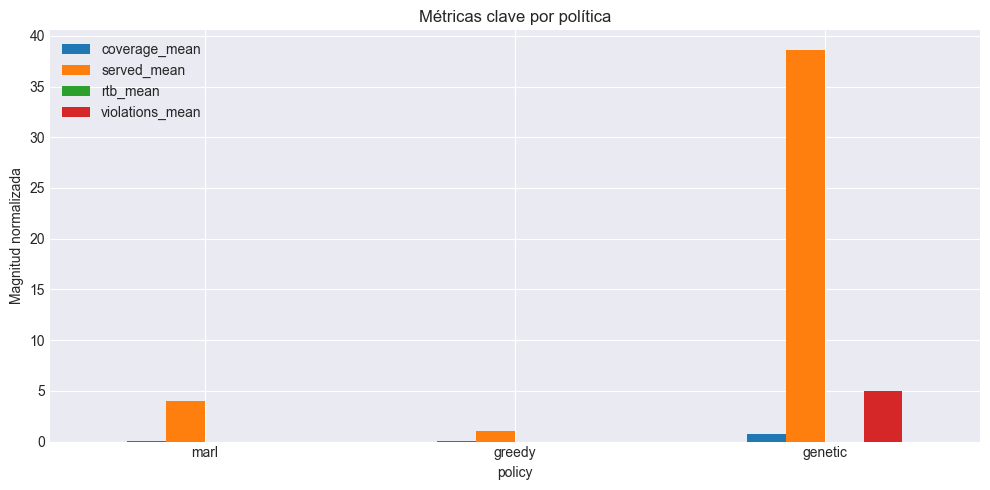

In [11]:
eval_view = eval_df[["policy", "coverage_mean", "served_mean", "rtb_mean", "violations_mean", "distance_mean", "energy_per_uav_mean"]]
display(Markdown("**Comparativa de políticas en evaluación**"))
display(eval_view.round(3))

plot_df = eval_view.set_index("policy")[["coverage_mean", "served_mean", "rtb_mean", "violations_mean"]]
plot_df.plot(kind="bar", figsize=(10, 5))
plt.ylabel("Magnitud normalizada")
plt.title("Métricas clave por política")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Cobertura por episodio (determinista)

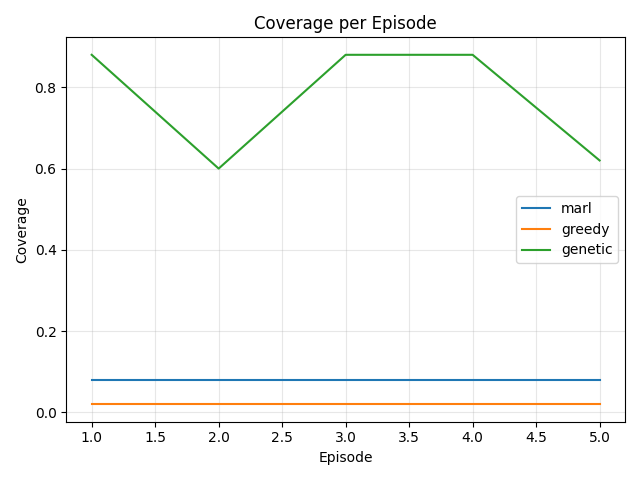

#### Cobertura promedio por política

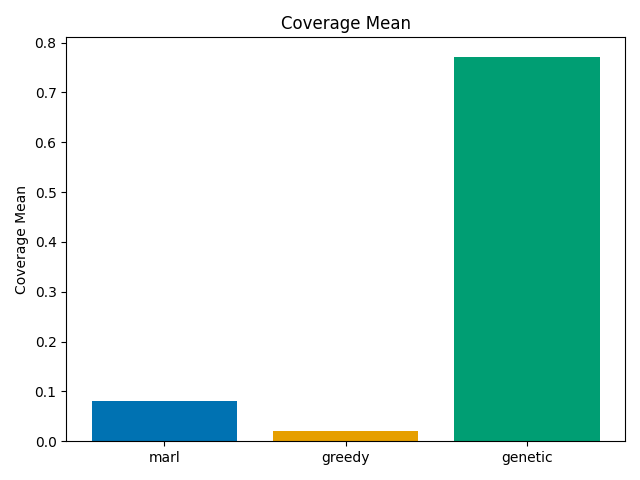

#### Distancia por episodio

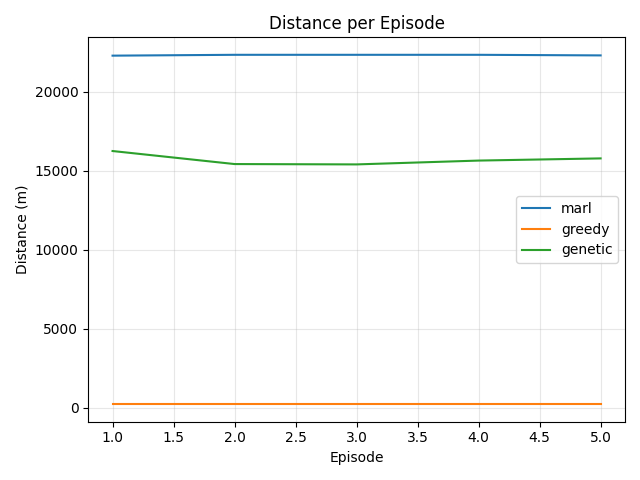

#### Consumo energético por episodio

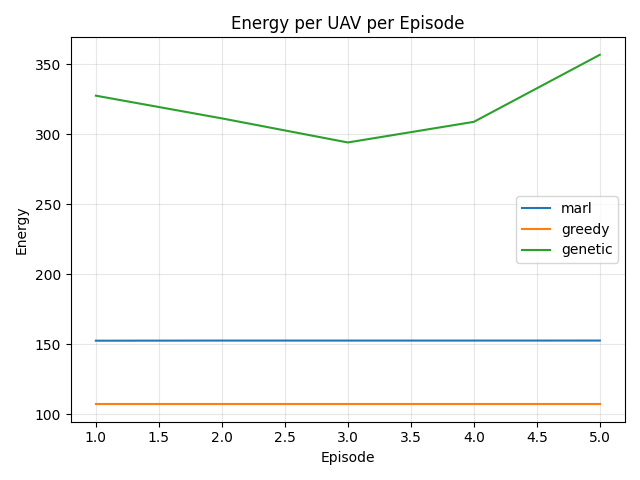

#### RTB promedio por política

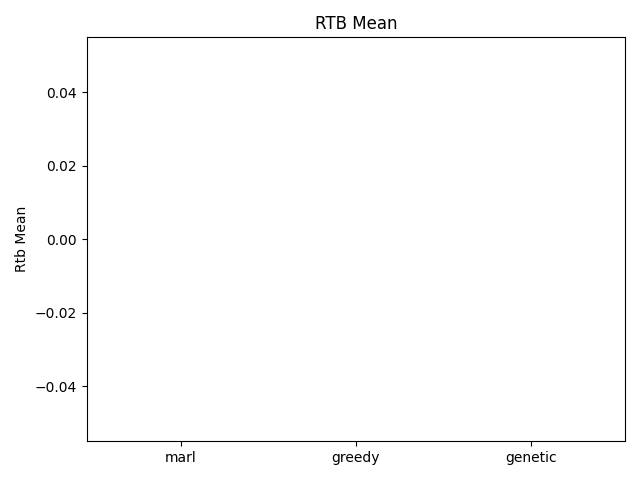

#### Pérdida entrenamiento Lurigancho fixed

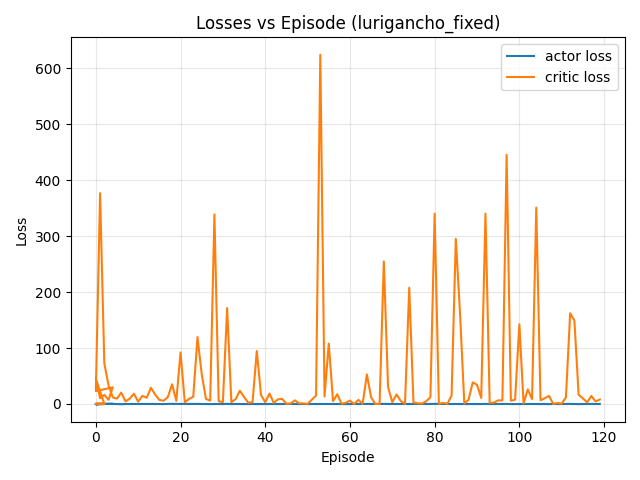

#### Pérdida entrenamiento Abstract

FileNotFoundError: [Errno 2] No such file or directory: 'results/plots/abstract_loss.png'

In [12]:
plot_assets = [
    ("Cobertura por episodio (determinista)", "results/plots/lurigancho_fixed_det/coverage_per_episode.png"),
    ("Cobertura promedio por política", "results/plots/lurigancho_fixed_det/coverage_mean_bar.png"),
    ("Distancia por episodio", "results/plots/lurigancho_fixed_det/distance_per_episode.png"),
    ("Consumo energético por episodio", "results/plots/lurigancho_fixed_det/energy_per_uav_per_episode.png"),
    ("RTB promedio por política", "results/plots/lurigancho_fixed_det/rtb_mean_bar.png"),
    ("Pérdida entrenamiento Lurigancho fixed", "results/plots/lurigancho_fixed_loss.png"),
    ("Pérdida entrenamiento Abstract", "results/plots/abstract_loss.png"),
]

for title, path in plot_assets:
    display(Markdown(f"#### {title}"))
    display(Image(filename=path, width=640))
